# Paris

This notebook illustrates the hierarchical clustering of graphs by the [Paris algorithm](https://scikit-network.readthedocs.io/en/latest/reference/hierarchy.html).

In [1]:
import numpy as np

In [2]:
import sknetwork as skn

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/types/containers.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


## Undirected graphs

**Loading**

In [3]:
adjacency = skn.toy_graphs.karate_club()

**Clustering**

In [4]:
paris = skn.hierarchy.Paris(engine='python')

In [5]:
paris.fit(adjacency)

Paris(engine='python', weights='degree', reorder=True)

In [6]:
dendrogram = paris.dendrogram_

**Visualization**

In [7]:
from scipy.cluster.hierarchy import dendrogram as show_dendrogram

In [8]:
# Warning: If the image does not appear, run the cell again.
show_ = show_dendrogram(dendrogram)

**Cuts of the dendrogram**

In [9]:
# default = 2 clusters
labels = skn.hierarchy.straight_cut(dendrogram)
print(labels)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1] [17 17]


In [11]:
# cut with 4 clusters
labels = skn.hierarchy.straight_cut(dendrogram, n_clusters = 4)
print(labels)

[0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 2 2 2 2 1 2 1 1]


In [12]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2 3] [12  9  8  5]


**Visualization**

In [13]:
from networkx import from_scipy_sparse_matrix, draw

In [14]:
graph = from_scipy_sparse_matrix(adjacency)

In [15]:
colors = ['r','g','b','c','m','y']

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


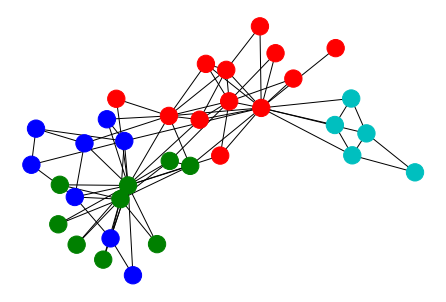

In [16]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color=[colors[labels[i]] for i in graph])

**Metrics**

In [17]:
skn.hierarchy.dasgupta_cost(adjacency, dendrogram)

0.6666666666666667

In [18]:
skn.hierarchy.tree_sampling_divergence(adjacency, dendrogram)

0.4873296566055281

**Parameters**

In [19]:
# default engine = numba if available
paris = skn.hierarchy.Paris()
paris.fit(adjacency)

Paris(engine='numba', weights='degree', reorder=True)